Rupesh Bharambe (AI3107)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [2]:
# Load dataset
df = pd.read_excel("Hourly-Data-21-24.xlsx")

In [6]:
# Combine date and time
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

In [7]:
# Drop original columns
df.drop(columns=['Date', 'Time'], inplace=True)

In [8]:
# Encode categorical columns
le_season = LabelEncoder()
le_conditions = LabelEncoder()
le_weekday = LabelEncoder()

df['Season'] = le_season.fit_transform(df['Season'])
df['Conditions'] = le_conditions.fit_transform(df['Conditions'])
df['Weekday'] = le_weekday.fit_transform(df['Weekday'])

In [9]:
# Feature scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [10]:
# Convert to supervised sequences
def create_sequences(data, n_steps=24):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps, 0])  # Predicting demand
    return np.array(X), np.array(y)

n_steps = 24  # past 24 hours
X, y = create_sequences(scaled, n_steps)

In [11]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [12]:
# Define LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

C:\Users\rupes\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse')

In [14]:
# Save best model
checkpoint = ModelCheckpoint("lstm_weather_model.h5", save_best_only=True, monitor='val_loss', mode='min')


In [15]:
# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=20, batch_size=32, callbacks=[checkpoint], verbose=1)


Epoch 1/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116

729/729 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0116 - val_loss: 9.3308e-04
Epoch 2/20
726/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8793e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8.8751e-04 - val_loss: 6.1682e-04
Epoch 3/20
725/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2513e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.2481e-04 - val_loss: 4.4252e-04
Epoch 4/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5.0968e-04 - val_loss: 4.4598e-04
Epoch 5/20
728/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5203e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.5199e-04 - val_loss: 3.8259e-04
Epoch 6/20
723/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1548e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 4.1536e-04 - val_loss: 3.3512e-04
Epoch 7/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.7128e-04 - val_loss: 3.5394e-04
Epoch 8/20
719/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6319e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.6298e-04 - val_loss: 3.0712e-04
Epoch 9/20
722/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5353e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.5337e-04 - val_loss: 2.7539e-04
Epoch 10/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.1891e-04 - val_loss: 3.5102e-04
Epoch 11/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.1901e-04 - val_loss: 3.4565e-04
Epoch 12/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.2074e-04 - val_loss: 3.0278e-04
Epoch 13/20
720/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9888e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.9891e-04 - val_loss: 2.5579e-04
Epoch 14/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 3.0593e-04 - val_loss: 3.0776e-04
Epoch 15/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.8064e-04 - val_loss: 2.5640e-04
Epoch 16/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.6900e-04 - val_loss: 2.6453e-04
Epoch 17/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.6676e-04 - val_loss: 2.9858e-04
Epoch 18/20
726/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7207e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.7202e-04 - val_loss: 2.4447e-04
Epoch 19/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.6061e-04 - val_loss: 2.7695e-04
Epoch 20/20
728/729 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4835e-04

729/729 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 2.4837e-04 - val_loss: 2.1405e-04


In [22]:
import joblib
# Load best model
model.load_weights("lstm_weather_model.h5")
joblib.dump(scaler, "scaler.save")

['scaler.save']

In [17]:
# Evaluate
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}")

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE: 0.0002, MAE: 0.0109


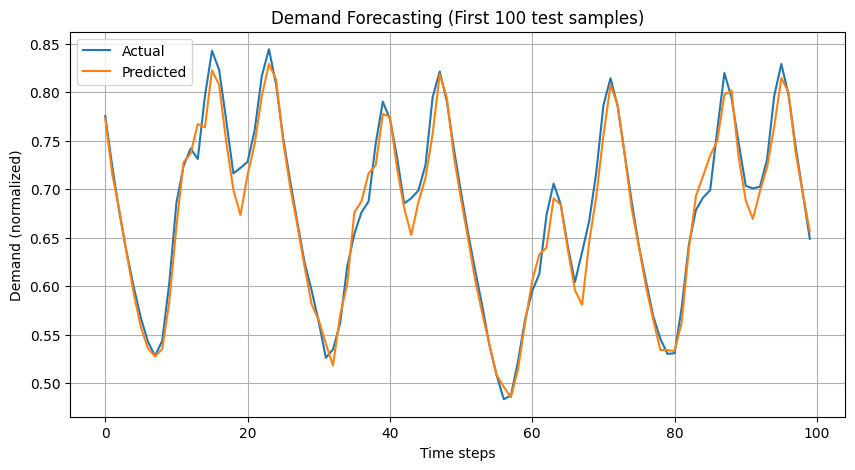

In [18]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual')
plt.plot(pred[:100], label='Predicted')
plt.title("Demand Forecasting (First 100 test samples)")
plt.xlabel("Time steps")
plt.ylabel("Demand (normalized)")
plt.legend()
plt.grid(True)
plt.show()

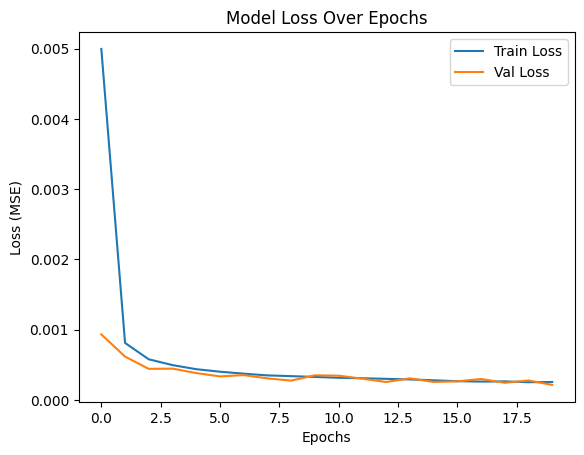

In [19]:
# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


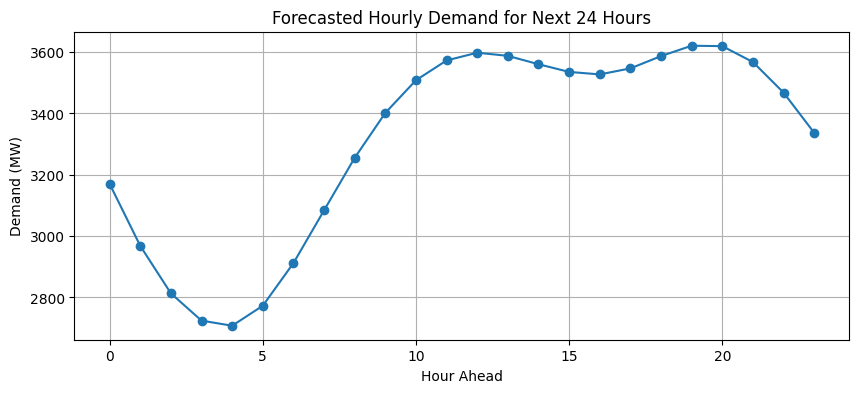

In [26]:
future_steps = 24
forecast = []

# Start with last known data
current_input = scaled[-n_steps:].copy()

for _ in range(future_steps):
    input_seq = np.expand_dims(current_input, axis=0)
    pred_scaled = model.predict(input_seq)[0][0]
    
    # Construct new row
    new_row = current_input[-1].copy()
    new_row[0] = pred_scaled  # insert predicted demand
    current_input = np.vstack([current_input[1:], new_row])  # slide window
    
    # Inverse scale
    dummy = new_row.reshape(1, -1)
    pred_original = scaler.inverse_transform(dummy)[0][0]
    forecast.append(pred_original)

# Plot next 24 hour forecast
plt.figure(figsize=(10, 4))
plt.plot(forecast, marker='o')
plt.title("Forecasted Hourly Demand for Next 24 Hours")
plt.xlabel("Hour Ahead")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.show()
